In [1]:
import pandas as pd

In [2]:
Morning_Shift = pd.read_csv('./Data/Morning_Shift_Passed',header=None)

In [3]:
Morning_Shift.columns=['Date_Time','Passed_Morning_Left']


In [4]:
Morning_Shift.reset_index(drop=True,inplace=True)

In [5]:
Morning_Shift

,Date_Time,Passed_Morning_Left
0,2018-10-05,7351
1,2018-10-06,0
2,2018-10-07,0
3,2018-10-08,240
4,2018-10-09,0
5,2018-10-10,0
6,2018-10-11,0
7,2018-10-12,0
8,2018-10-13,0
9,2018-10-14,0


### Visualize how the on data line graph will look like

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
Morning_Shift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
Date_Time              196 non-null object
Passed_Morning_Left    196 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [9]:
Morning_Shift['Date_Time'] = pd.to_datetime(Morning_Shift['Date_Time'])
Morning_Shift['Date_Time'].dt

In [10]:
Morning_Shift.set_index('Date_Time', inplace=True)

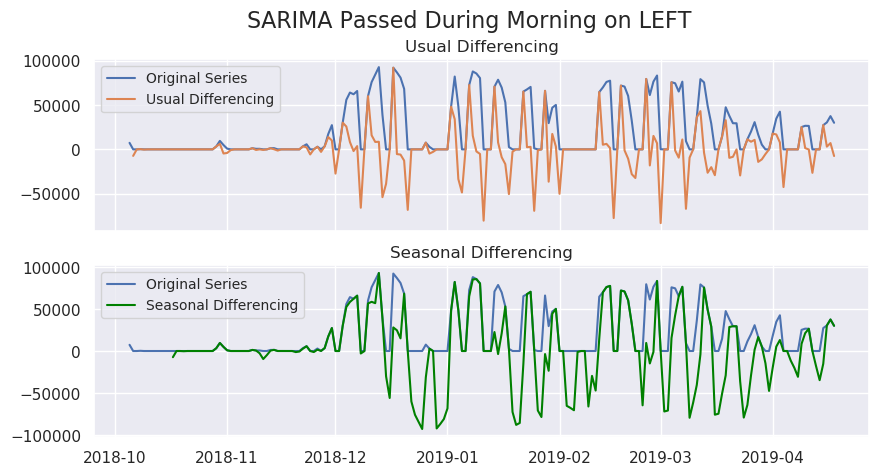

In [11]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(Morning_Shift.Passed_Morning_Left[:], label='Original Series')
axes[0].plot(Morning_Shift.Passed_Morning_Left[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(Morning_Shift.Passed_Morning_Left[:], label='Original Series')
axes[1].plot(Morning_Shift.Passed_Morning_Left[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('SARIMA Passed During Morning on LEFT', fontsize=16)
plt.show()

### Split the dataset
The train and Test set will be 80:20 each

In [12]:
percent_training = 0.80
split_point = round(len(Morning_Shift)*percent_training)

In [13]:
train_set_1, test_set_1 = Morning_Shift[0:split_point], Morning_Shift[split_point:]

In [17]:
import numpy as np
train_set_1 = np.log(train_set_1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [18]:
train_set_1.dtypes

Passed_Morning_Left    float64
dtype: object

In [19]:
train_set_1.replace(to_replace=np.NINF,value=0,inplace=True)

In [20]:
train_set_1

,Passed_Morning_Left
Date_Time,
2018-10-05,8.902592
2018-10-06,0.000000
2018-10-07,0.000000
2018-10-08,5.480639
2018-10-09,0.000000
2018-10-10,0.000000
2018-10-11,0.000000
2018-10-12,0.000000
2018-10-13,0.000000


In [21]:
training_diff_1 = train_set_1.diff(periods=1).values[1:]

Text(0,0.5,'Frequency')

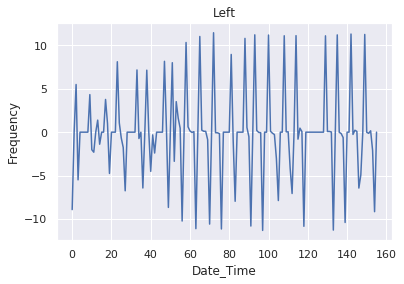

In [22]:
plt.plot(training_diff_1)
plt.title('Left')
plt.xlabel('Date_Time')
plt.ylabel('Frequency')

In [30]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
lag_acf = acf(training_diff_1,nlags =40)
lag_pacf = pacf(training_diff_1,nlags =40,method='ols')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


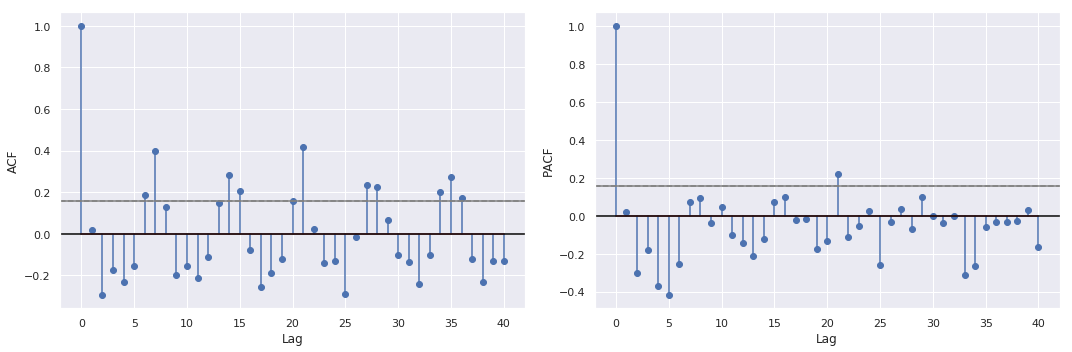

In [25]:
#Plot Acf
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=1.96/np.sqrt(len(training_diff_1)),linestyle='-',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training_diff_1)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

#Plot PACF
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=1.96/np.sqrt(len(training_diff_1)),linestyle='-',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training_diff_1)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [27]:
import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(training_diff_1, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=870.876, BIC=885.725, Fit time=3.794 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=986.838, BIC=992.778, Fit time=0.036 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=952.281, BIC=964.160, Fit time=0.895 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=900.676, BIC=912.555, Fit time=1.944 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=869.782, BIC=887.601, Fit time=5.227 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=949.291, BIC=964.141, Fit time=1.079 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=873.078, BIC=893.867, Fit time=11.787 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=955.642, BIC=967.521, Fit time=0.657 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 2, 12); AIC=856.037, BIC=879.796, Fit time=14.080 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 12)   Log Likelihood                -416.160
Date:                            Fri, 11 Oct 2019   AIC                            848.319
Time:                                    02:32:56   BIC                            872.078
Sample:                                         0   HQIC                           857.973
                                            - 156                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0116      0.008     -1.465      0.143      -0.027       0.004
ar.L1          0.5763      0.127      4.521      0.000       0.326       0.826
ar.L2         -0.2618      0.129     -2.034      0.042      -0.514      -0.010
ma.L1         -0.9885      0.139     -7.114      0.000      -1.261      -0.716
ar.S.L12      -0.3072      0.130     -2.366      0.018      -0.562      -0.053
ar.S.L24      -0.3075      0.135     -2.277      0.023      -0.572      -0.043
ma.S.L12      -0.7493      0.127     -5.912      0.000      -0.998      -0.501
sigma2        15.7613      3.118      5.055      0.000       9.650      21.873
===================================================================================
Ljung-Box (Q):                      101.62   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.00   Prob(JB):                         0.74
Heteroskedasticity (H):               1.57   Skew:                             0.13
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model1 = SARIMAX(training_diff_1, order= (2,0,1),seasonal_order=(2,1,1,12),enforce_stationary= False, enforce_invertibility=False)
model_fit = model1.fit(disp=False)

In [36]:
K = len(test_set_1)
forecast = model_fit.forecast(K)
forecast = np.exp(forecast)
out = forecast.to_csv('./Data/Passed_Morning_Left.csv') # To csv

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'